In [1]:
#import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
df_user=pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')
df_eng=pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])
df_user=df_user.rename({'object_id':'user_id'}, axis=1)

In [3]:
print(df_eng.head())
print(df_user.head())

           time_stamp  user_id  visited
0 2014-04-22 03:53:30        1        1
1 2013-11-15 03:45:04        2        1
2 2013-11-29 03:45:04        2        1
3 2013-12-09 03:45:04        2        1
4 2013-12-25 03:45:04        2        1
   user_id  creation_time               name                       email  \
0        1   4/22/14 3:53     Clausen August    AugustCClausen@yahoo.com   
1        2  11/15/13 3:45      Poole Matthew      MatthewPoole@gustr.com   
2        3  3/19/13 23:14  Bottrill Mitchell  MitchellBottrill@gustr.com   
3        4   5/21/13 8:09    Clausen Nicklas   NicklasSClausen@yahoo.com   
4        5  1/17/13 10:14          Raw Grace          GraceRaw@yahoo.com   

  creation_source  last_session_creation_time  opted_in_to_mailing_list  \
0    GUEST_INVITE                1.398139e+09                         1   
1      ORG_INVITE                1.396238e+09                         0   
2      ORG_INVITE                1.363735e+09                         0   
3  

In [4]:
#Find the users over 3 times visiting
active_users=df_eng.groupby('user_id').sum()
active_users=active_users[active_users['visited']>=3]
active_users.head()

,visited
user_id,
2,14
10,284
20,7
33,18
42,342


In [5]:
active_user_list=active_users.index

In [6]:
df=df_user.merge(active_users, on='user_id', how='left')

In [7]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
0,1,4/22/14 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,11/15/13 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0
2,3,3/19/13 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,5/21/13 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,1/17/13 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN


In [8]:
df.isnull().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
visited                       9752
dtype: int64

In [9]:
df.dropna(axis=0,inplace=True)
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
1,2,11/15/13 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0
9,10,1/16/13 22:08,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,284.0
32,33,3/11/14 6:29,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,18.0
42,43,12/31/12 7:13,Gomes Beatrice,vgqmpljq@yyyxt.com,GUEST_INVITE,1.366010e+09,0,0,63,149.0,8.0
49,50,6/3/12 11:02,Oliveira Gabrielly,GabriellyAlmeidaOliveira@gmail.com,GUEST_INVITE,1.350990e+09,0,0,61,50.0,17.0


In [10]:
df.describe()

,user_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
count,1285.000000,1.285000e+03,1285.000000,1285.000000,1285.000000,1285.00000,1285.000000
mean,6064.195331,1.390933e+09,0.253696,0.147082,158.482490,6002.53930,88.091829
std,3487.184318,1.662006e+07,0.435295,0.354325,122.241535,3342.91491,125.020413
min,2.000000,1.340170e+09,0.000000,0.000000,0.000000,29.00000,3.000000
25%,3113.000000,1.383621e+09,0.000000,0.000000,50.000000,3122.00000,6.000000
50%,6016.000000,1.400859e+09,0.000000,0.000000,135.000000,6035.00000,25.000000
75%,9145.000000,1.401692e+09,1.000000,0.000000,254.000000,8804.00000,121.000000
max,11981.000000,1.401926e+09,1.000000,1.000000,415.000000,11994.00000,606.000000


#### Conclusion 1: There are 1285 user_id who visit the website for more than 3 times, which belongs to the active users. The average visiting times of these users visited website is 88 times.

In [11]:
df=df[['user_id', 'visited','invited_by_user_id', 'creation_source', 'opted_in_to_mailing_list','enabled_for_marketing_drip']]

In [12]:
df.head()

,user_id,visited,invited_by_user_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip
1,2,14.0,316.0,ORG_INVITE,0,0
9,10,284.0,4143.0,ORG_INVITE,1,1
32,33,18.0,79.0,GUEST_INVITE,0,0
42,43,8.0,149.0,GUEST_INVITE,0,0
49,50,17.0,50.0,GUEST_INVITE,0,0


In [13]:
def Encode(df):
    for column in df.columns[df.columns.isin(['creation_source'])]:
        df[column]=df[column].factorize()[0]
    return df
df_en=Encode(df.copy())
df_en['user_id']=df_en.index
df_en.head()

,user_id,visited,invited_by_user_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip
1,1,14.0,316.0,0,0,0
9,9,284.0,4143.0,0,1,1
32,32,18.0,79.0,1,0,0
42,42,8.0,149.0,1,0,0
49,49,17.0,50.0,1,0,0


Index(['user_id', 'visited', 'invited_by_user_id', 'creation_source',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip'],
      dtype='object')

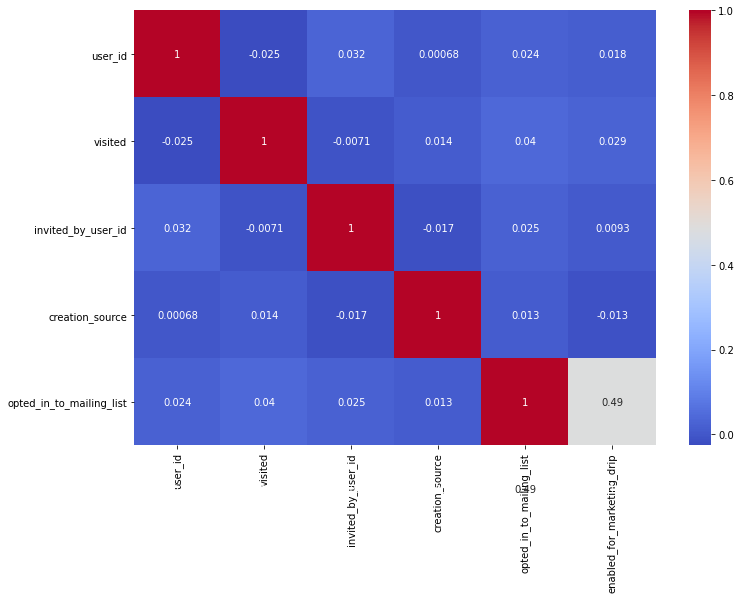

In [14]:
corr=df_en.corr(method ='kendall')
plt.figure(figsize=(12,8))
ax=sns.heatmap(corr, annot=True, cmap='coolwarm',square=True,fmt='.2g',xticklabels='auto', yticklabels='auto')
ax.set_ylim([5,0])
df_en.columns

### Conclusion 2:
#### Only 'opted_in_to_mailing_list' shows strong correlation with 'enabled_for_marketing_drip' (corr=0.49). All the other factors only have no strong correlaiton with each other.

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
for col in df_en.columns:
    df_en[col]=df_en[col].astype('float64')
df_en.head()

,user_id,visited,invited_by_user_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip
1,1.0,14.0,316.0,0.0,0.0,0.0
9,9.0,284.0,4143.0,0.0,1.0,1.0
32,32.0,18.0,79.0,1.0,0.0,0.0
42,42.0,8.0,149.0,1.0,0.0,0.0
49,49.0,17.0,50.0,1.0,0.0,0.0


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#scale data
scaler = StandardScaler()
features = scaler.fit_transform(df_en)

#fit PCA
pca = PCA()
components = pca.fit_transform(features)

In [30]:
np.sum(pca.explained_variance_ratio_[0:5])

0.9144399647337065

#### Conclusion 3:
The first 5 principal components account for 91% of the variation in the data.

In [32]:
df_comp = pd.DataFrame(pca.components_,columns=df_en.columns,index=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])
#absolute values of correlation with principal components
best_features = np.absolute(df_comp[np.absolute(df_comp) > 0.1])
best_features.head()

,user_id,visited,invited_by_user_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip
PC-1,NaN,0.104983,NaN,NaN,0.699582,0.69993
PC-2,0.594134,0.391284,0.621451,0.324696,NaN,NaN
PC-3,0.444607,0.313367,0.190288,0.812716,NaN,NaN
PC-4,0.107277,0.816840,0.420259,0.364058,NaN,NaN
PC-5,0.657670,0.263589,0.629080,0.316075,NaN,NaN


In [33]:
#sum correlations to get a relative estimate of the feature importance
best_features.head(4).sum(axis=0).sort_values(ascending=False)

visited                       1.626474
creation_source               1.501471
invited_by_user_id            1.231998
user_id                       1.146018
enabled_for_marketing_drip    0.699930
opted_in_to_mailing_list      0.699582
dtype: float64

### Conclusion 4:
#### 1. The first 5 principal components account for most of the data variation of active users, which indicats that these variables are highly predictive of adopted users. 
####  2. From the summed correlations with the top principal components, we can see three features that stand out: visited times, creation_source and invited_by_user_id. These factors are the most predictive of future user adoption.

### End